# Network Traffic Anomaly Detection - Model Evaluating

In this notebook, we evaluate machine learning models to detect anomalous or malicious network traffic using the celaned CICDS2017 dataset and the previously trained models.

Specifically, we will:

- Load the trained models and the test dataset.
- Evaluate model performance using:
  - Confusion Matrix
  - Precision, Recall, and F1-Score
  - ROC-AUC curve
- Compare results and identify the best-performing model for anomaly detection.

In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

from utils import (
    load_saved_object
)
from utils_evaluate import (
    calculate_pred,
    print_evaluation_metrics,
    plot_roc_curve,
    combine_predictions
)


In [2]:
# Load the test set for the supervised models
x_val = load_saved_object("../data/dataset/1_x_val.pkl")
y_val = load_saved_object("../data/dataset/1_y_val.pkl")

Evaluation Metrics for Random Forest
Accuracy: 1.00
Classification Report:
{'0': {'precision': 0.9990397735887199, 'recall': 0.999494387703509, 'f1-score': 0.9992670289397194, 'support': 19778.0}, '1': {'precision': 0.9991801934743401, 'recall': 0.998443516015401, 'f1-score': 0.9988117189100594, 'support': 12207.0}, 'accuracy': 0.9990933249960919, 'macro avg': {'precision': 0.99910998353153, 'recall': 0.998968951859455, 'f1-score': 0.9990393739248894, 'support': 31985.0}, 'weighted avg': {'precision': 0.9990933645077058, 'recall': 0.9990933249960919, 'f1-score': 0.9990932609380918, 'support': 31985.0}}
Confusion Matrix:


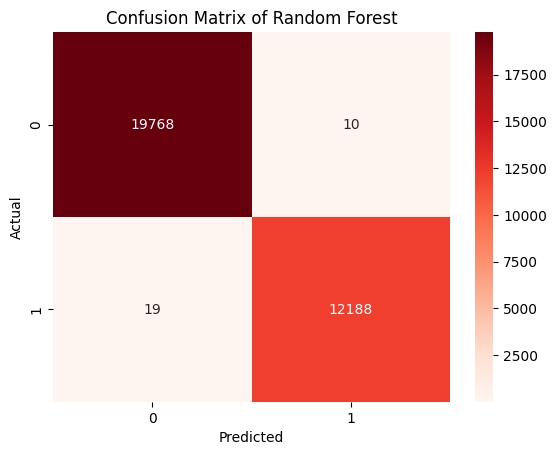

In [4]:
# Evaluate the model - Random Forest
model_rf = load_saved_object("../models/random_forest_model.pkl")
y_pred_rf = calculate_pred(model_rf, x_val, y_val)
# Print evaluation metrics
print_evaluation_metrics(y_val, y_pred_rf, "Random Forest")

Evaluation Metrics for Decision Tree
Accuracy: 1.00
Classification Report:
{'0': {'precision': 0.9992415048543689, 'recall': 0.9991404590959652, 'f1-score': 0.999190979420539, 'support': 19778.0}, '1': {'precision': 0.9986075845687608, 'recall': 0.998771196854264, 'f1-score': 0.9986893840104849, 'support': 12207.0}, 'accuracy': 0.9989995310301704, 'macro avg': {'precision': 0.9989245447115649, 'recall': 0.9989558279751145, 'f1-score': 0.9989401817155119, 'support': 31985.0}, 'weighted avg': {'precision': 0.9989995706687688, 'recall': 0.9989995310301704, 'f1-score': 0.998999546712378, 'support': 31985.0}}
Confusion Matrix:


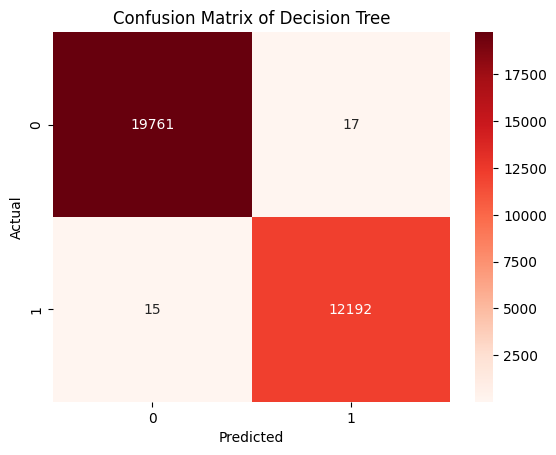

In [5]:
# Evaluate the model - Decision Tree
model_dt = load_saved_object("../models/decision_tree_model.pkl")
y_pred_dt = calculate_pred(model_dt, x_val, y_val)
# Print evaluation metrics
print_evaluation_metrics(y_val, y_pred_dt, "Decision Tree")

Evaluation Metrics for XGBoost
Accuracy: 1.00
Classification Report:
{'0': {'precision': 0.9997977346278317, 'recall': 0.9996966326221054, 'f1-score': 0.9997471810689185, 'support': 19778.0}, '1': {'precision': 0.9995085592595626, 'recall': 0.9996723191611371, 'f1-score': 0.9995904325032765, 'support': 12207.0}, 'accuracy': 0.9996873534469283, 'macro avg': {'precision': 0.9996531469436971, 'recall': 0.9996844758916212, 'f1-score': 0.9996688067860975, 'support': 31985.0}, 'weighted avg': {'precision': 0.9996873715288647, 'recall': 0.9996873534469283, 'f1-score': 0.9996873583476181, 'support': 31985.0}}
Confusion Matrix:


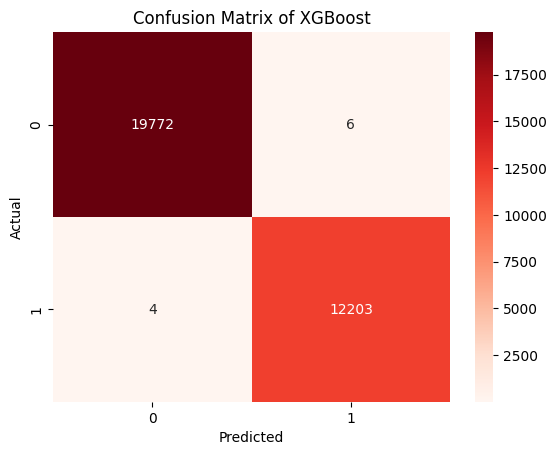

In [6]:
# Evaluate the model - XGBoost
model_xgb = load_saved_object("../models/xgboost_model.pkl")
y_pred_xgb = calculate_pred(model_xgb, x_val, y_val)
# Print evaluation metrics
print_evaluation_metrics(y_val, y_pred_xgb, "XGBoost")

In [7]:
# Load the test set for the unsupervised models
xpca_test = load_saved_object("../data/dataset/2pca_x_test.pkl")
xae_test = load_saved_object("../data/dataset/2ae_x_test.pkl")
y_test = load_saved_object("../data/dataset/2_y_test.pkl")

Evaluation Metrics for Isolation Forest
Accuracy: 0.67
Classification Report:
{'0': {'precision': 0.7953327124081548, 'recall': 0.6200022588660492, 'f1-score': 0.6968075943169557, 'support': 123956.0}, '1': {'precision': 0.5438275371161277, 'recall': 0.7395398453859425, 'f1-score': 0.6267607205839677, 'support': 75931.0}, 'accuracy': 0.6654109571908128, 'macro avg': {'precision': 0.6695801247621413, 'recall': 0.6797710521259959, 'f1-score': 0.6617841574504617, 'support': 199887.0}, 'weighted avg': {'precision': 0.6997935354476776, 'recall': 0.6654109571908128, 'f1-score': 0.6701989145657987, 'support': 199887.0}}
Confusion Matrix:


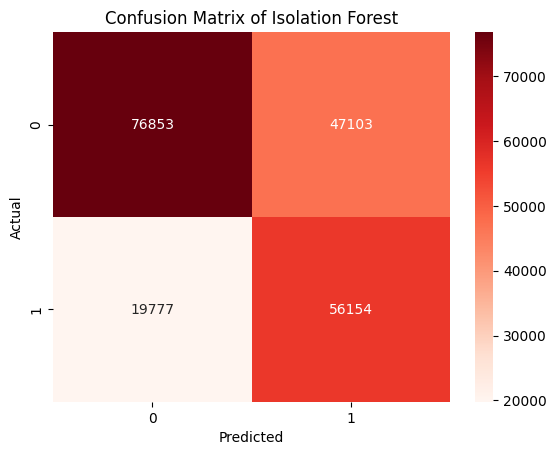

' import matplotlib.pyplot as plt\nplt.figure(figsize=(8,6))\nplt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=\'coolwarm\', alpha=0.5)\nplt.title("Distribuição de ataques vs normais (PCA)")\nplt.show() '

In [10]:
# Evaluate the model - Isolation Forest
model_iso = load_saved_object("../models/isolation_forest_model2.pkl")
y_pred_iso = calculate_pred(model_iso, xpca_test, y_test, 'iso')
# Print evaluation metrics
print_evaluation_metrics(y_test, y_pred_iso, "Isolation Forest")
""" import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='coolwarm', alpha=0.5)
plt.title("Distribuição de ataques vs normais (PCA)")
plt.show() """

6247/6247 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
Best threshold based on F1: 5.6779291335238546e-05
Evaluation Metrics for Autoencoder
Accuracy: 0.75
Classification Report:
{'0': {'precision': 0.9083177810310338, 'recall': 0.6557084772015876, 'f1-score': 0.7616133883685737, 'support': 123956.0}, '1': {'precision': 0.6134469765588203, 'recall': 0.8919545376723604, 'f1-score': 0.7269380416990904, 'support': 75931.0}, 'accuracy': 0.7454511799166529, 'macro avg': {'precision': 0.760882378794927, 'recall': 0.773831507436974, 'f1-score': 0.744275715033832, 'support': 199887.0}, 'weighted avg': {'precision': 0.7963053187179286, 'recall': 0.7454511799166529, 'f1-score': 0.7484412773860659, 'support': 199887.0}}
Confusion Matrix:


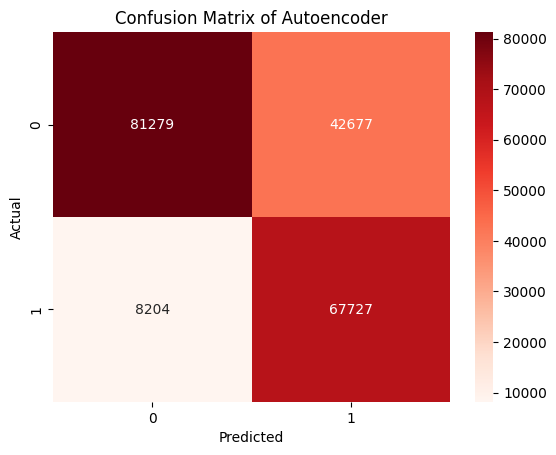

In [11]:
# Evaluate the model - Autoencoder
model_ae = load_saved_object("../models/autoencoder_model2.pkl")
y_pred_ae = calculate_pred(model_ae, xae_test, y_test, 'ae')
# Print evaluation metrics
print_evaluation_metrics(y_test, y_pred_ae, "Autoencoder")

Evaluation Metrics for Combined Model
Accuracy: 0.71
Classification Report:
{'0': {'precision': 0.9191783623488509, 'recall': 0.5801332730969053, 'f1-score': 0.7113210346703596, 'support': 123956.0}, '1': {'precision': 0.5721848207606882, 'recall': 0.916727028486389, 'f1-score': 0.704591464895943, 'support': 75931.0}, 'accuracy': 0.7079950171847094, 'macro avg': {'precision': 0.7456815915547695, 'recall': 0.7484301507916471, 'f1-score': 0.7079562497831513, 'support': 199887.0}, 'weighted avg': {'precision': 0.7873660553637504, 'recall': 0.7079950171847094, 'f1-score': 0.7087646755147305, 'support': 199887.0}}
Confusion Matrix:


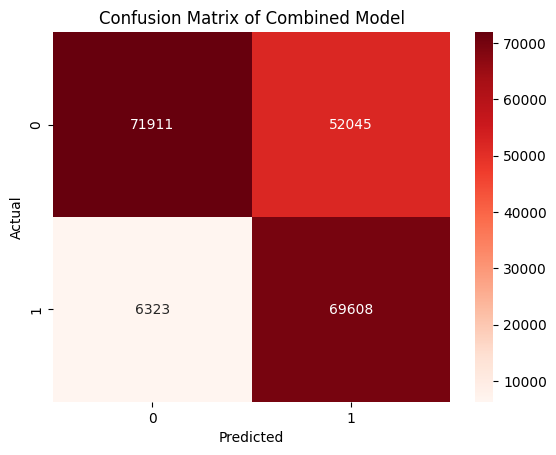

In [12]:
# Combine predictions from both models
y_pred_combined = combine_predictions(y_pred_iso, y_pred_ae)
print_evaluation_metrics(y_test, y_pred_combined, "Combined Model")

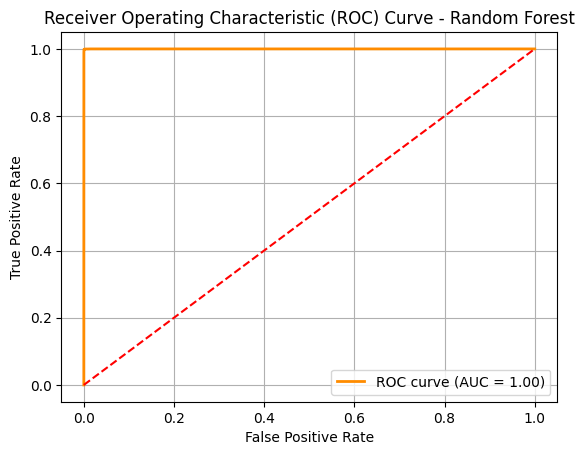

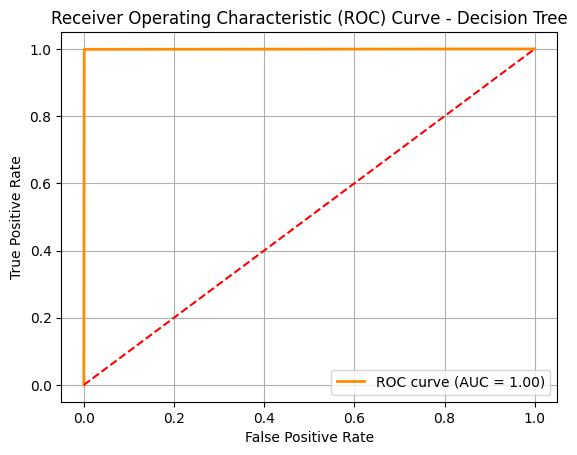

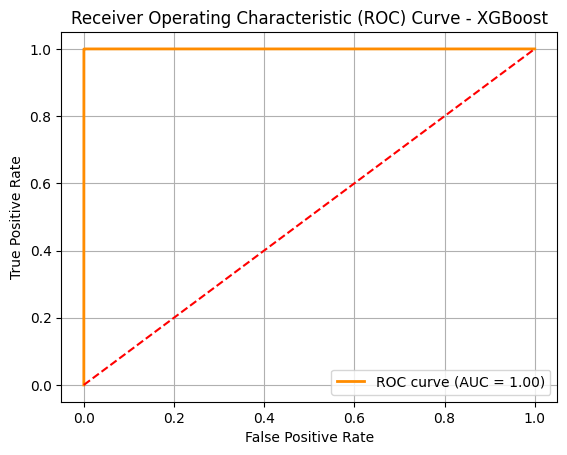

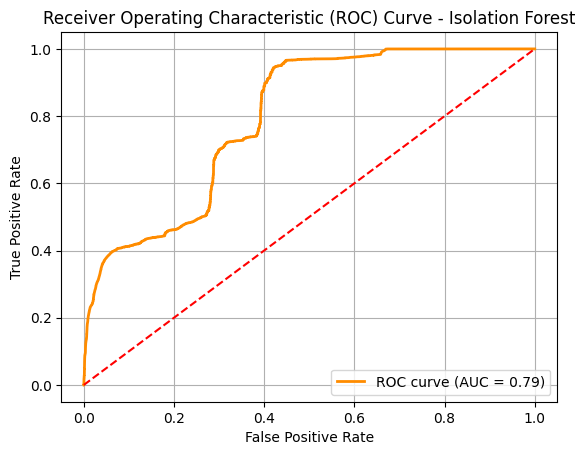

6247/6247 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


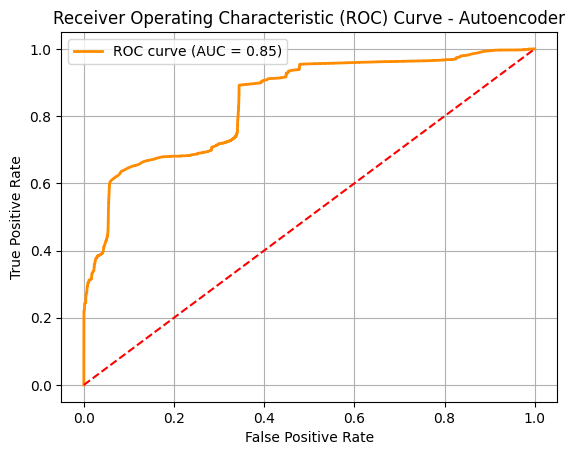

In [13]:
# Plot ROC curves
plot_roc_curve(model_rf, x_val, y_val, "Random Forest")
plot_roc_curve(model_dt, x_val, y_val, "Decision Tree")
plot_roc_curve(model_xgb, x_val, y_val, "XGBoost")
plot_roc_curve(model_iso, xpca_test, y_test, "Isolation Forest")
plot_roc_curve(model_ae, xae_test, y_test, "Autoencoder")